Libraries

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import csv


Ploting configurations.

In [67]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.rcParams.update({
    'figure.figsize': (8, 6),
    'figure.facecolor': 'white',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'axes.grid': True,
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3
})


Load data from data.csv file.


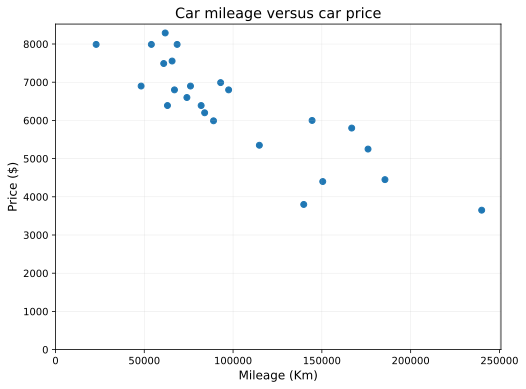

In [68]:
X = np.array([])
Y = np.array([])
with open("data.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    i = 0
    for row in csv_reader:
        if i != 0:
            X = np.append(X, float(row[0]))
            Y = np.append(Y, float(row[1]))
        i += 1
plt.title("Car mileage versus car price")
plt.scatter(X, Y)
plt.xlabel("Mileage (Km)")
plt.ylabel("Price ($)")
plt.xlim(0)
plt.ylim(0)
plt.show()


Initialize parameters.


In [69]:
theta_0 = 0.0
theta_1 = 0.0
learning_rate = 0.1
m = len(X)
epochs = 700


Define our linear regression model.


In [70]:
def f(X):
    return theta_0 + theta_1 * X


Data Normalization.


In [71]:
maxX = max(X)
maxY = max(Y)
X = X / maxX
Y = Y / maxY


Define ploting function and plot normalized data.


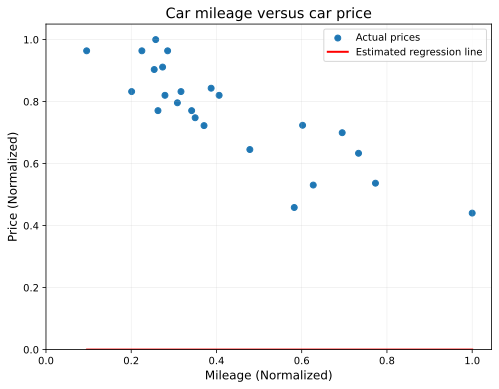

In [72]:
def plot_avp_prices(X, Y):
	plt.title('Car mileage versus car price')
	plt.scatter(X, Y, label='Actual prices')
	plt.plot(
		X, f(X), label='Estimated regression line', color='r', lw=2)
	plt.xlabel('Mileage (Normalized)')
	plt.ylabel('Price (Normalized)')
	plt.xlim(0)
	plt.ylim(0)
	plt.legend()
	plt.show()

plot_avp_prices(X, Y)

Define the mean squared error (MSE) cost function.


In [73]:
def cost():
	return (1 / (2 * m)) * sum((f(X) - Y) ** 2)


Train our model using gradient descent algorithm.


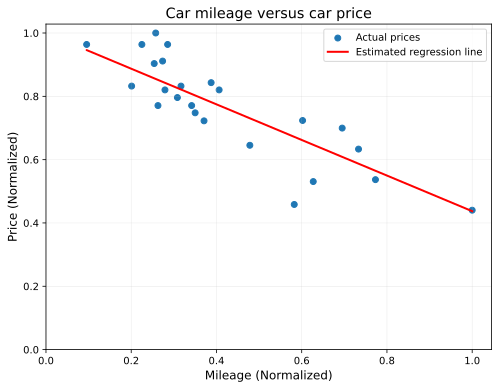

In [74]:
history = []
history.append(cost())
def update_weights(epoch):
	global theta_0, theta_1, history
	while epoch > 0:
		tmp_theta_0 = (1 / m) * sum(f(X) - Y)
		tmp_theta_1 = (1 / m) * sum(X * (f(X) - Y))
		theta_0 -= learning_rate * tmp_theta_0
		theta_1 -= learning_rate * tmp_theta_1
		history.append(cost())
		epoch -= 1
	plot_avp_prices(X, Y)

update_weights(epochs)


Adjust theta_0, theta_1, X and Y.


In [75]:
theta_0 *= maxY
theta_1 *= maxY / maxX
Y = Y * maxY
X = X * maxX

print(f'theta_0 = {theta_0}, theta_1 = {theta_1}')


theta_0 = 8287.598681051748, theta_1 = -0.01943306828095913


Display cost function values.

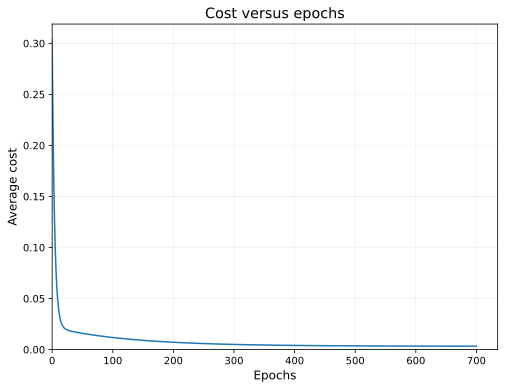

In [76]:
plt.plot(history)
plt.title("Cost versus epochs")
plt.xlabel("Epochs")
plt.ylabel("Average cost")
plt.xlim(0)
plt.ylim(0)
plt.show()


Calculate the algorithm precision.

In [77]:
precision = sum((Y - abs(Y - f(X))) / Y) / m * 100
print('precision: %.2f%%' % precision)

precision: 90.53%
